In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Data Collection
df = pd.read_csv(r"C:\Users\User\Desktop\Internship\spam.csv", encoding='latin1')  # Load the dataset

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
stop_words = set(stopwords.words('english'))  
ps = PorterStemmer()  
lemmatizer = WordNetLemmatizer() 

In [7]:
def preprocess_text(text):
    word_tokens = word_tokenize(text)  # Tokenize the text
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]  # Remove stop words
    stemmed_text = [ps.stem(word) for word in filtered_text]  # Apply stemming
    lemmatized_text = [lemmatizer.lemmatize(word) for word in stemmed_text]  # Apply lemmatization
    return " ".join(lemmatized_text)

In [8]:
df['v2'] = df['v2'].apply(preprocess_text)  # Apply the preprocessing to each text

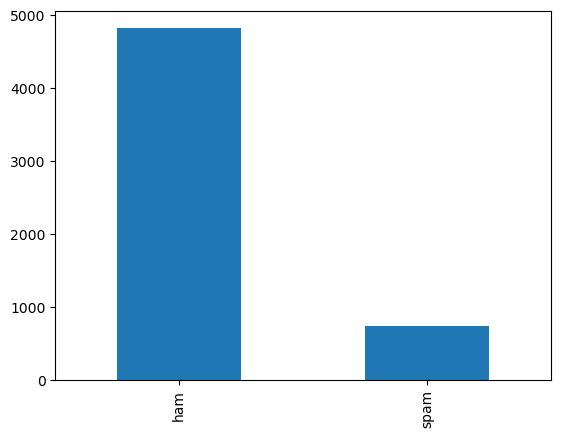

In [11]:
import matplotlib.pyplot as plt
df['v1'].value_counts().plot(kind='bar')
plt.show()

In [12]:
X = df['v2'] 
y = df['v1']  

In [13]:
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(X)  

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
clf = MultinomialNB()  
clf.fit(X_train, y_train)  

MultinomialNB()

In [16]:
y_pred = clf.predict(X_test) 
print("Model Accuracy: ", accuracy_score(y_test, y_pred)) 

Model Accuracy:  0.9757847533632287
